In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')

In [3]:
train.head(4)

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05


In [4]:
train.describe(include='all')

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# checking the null values
var1 = train.isna().sum().sum()
var2 = test.isna().sum().sum()
if var1 == 0 and var2 == 0:
    print('There are no null values in train and test.')
else:
    print(f'There are {var1} null values in train')
    print(f'There are {var2} null values in train')
print()

There are no null values in train and test.



In [6]:
print(f"Duplicate values in train: {train[test.columns].duplicated().sum()}")
print(f"Duplicate values in test:  {test.duplicated().sum()}")
print(f"Duplicate values in train and test together: {pd.concat([train, test])[test.columns].duplicated().sum()}")
print()

print('Sample lines from train:')
train.tail(5)

Duplicate values in train: 0
Duplicate values in test:  0
Duplicate values in train and test together: 0

Sample lines from train:


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61
5406,5406,190.7,0.0,125.2,166.6,7.9,1079.0,770.1,56,63.14


In [7]:
display(train[0:6].T)
print(train.columns.tolist())

,0,1,2,3,4,5
id,0.00,1.00,2.00,3.00,4.00,5.00
CementComponent,525.00,143.00,289.00,304.00,157.00,350.00
BlastFurnaceSlag,0.00,169.00,134.70,76.00,236.00,0.00
FlyAshComponent,0.00,143.00,0.00,0.00,0.00,0.00
WaterComponent,186.00,191.00,185.70,228.00,192.00,203.00
SuperplasticizerComponent,0.00,8.00,0.00,0.00,0.00,0.00
CoarseAggregateComponent,1125.00,967.00,1075.00,932.00,935.40,1055.00
FineAggregateComponent,613.00,643.00,795.30,670.00,781.20,775.00
AgeInDays,3.00,28.00,28.00,365.00,90.00,7.00
Strength,10.38,23.52,36.96,39.05,74.19,37.43


['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays', 'Strength']


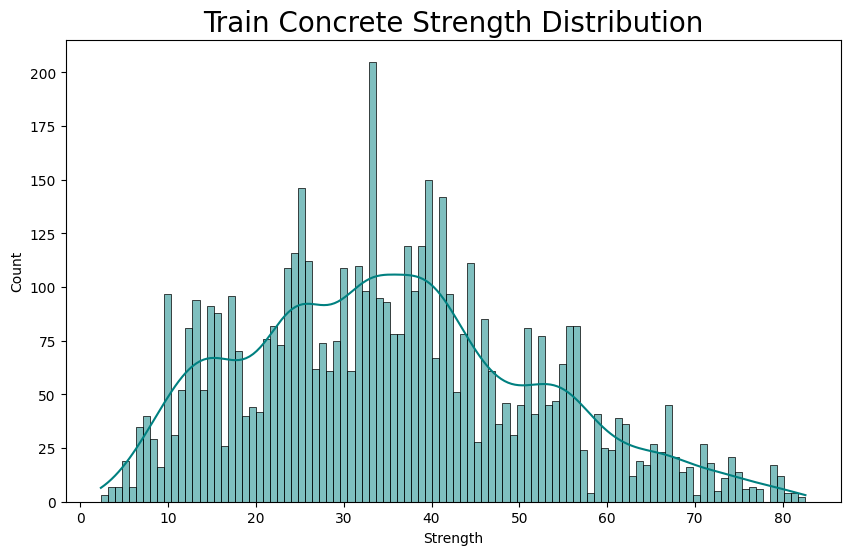

In [8]:
target = 'Strength'

# View Train Gemstone Price Distribution
plt.figure(figsize=(10, 6))
plt.title('Train Concrete Strength Distribution', fontsize=20)
sns.histplot(
    data=train[target], color="teal",
    kde=True, 
    bins=100);

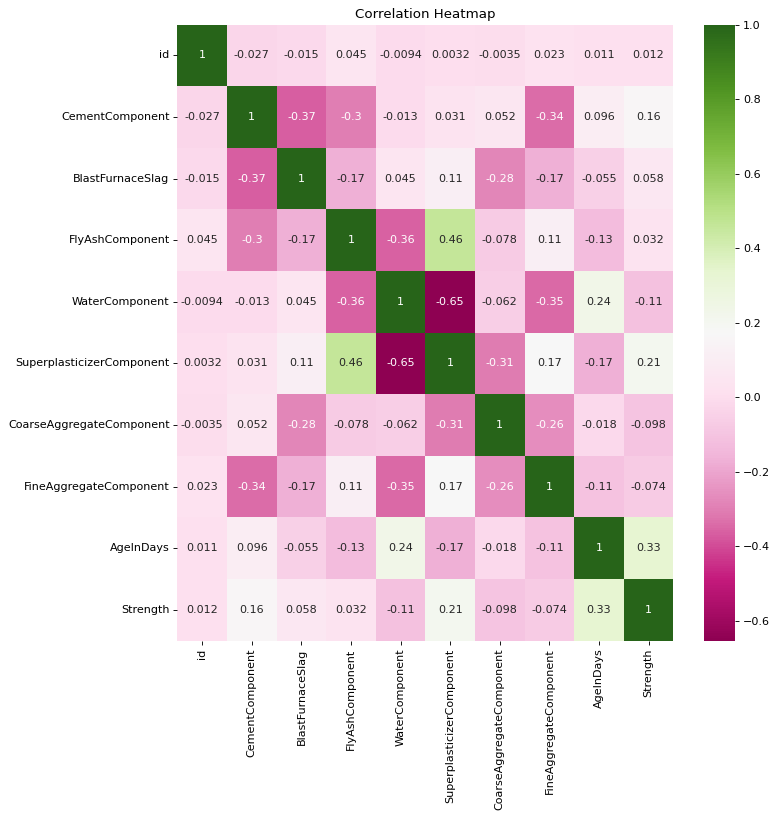

In [9]:
#Mapping the correlation between the data
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(train.corr(), cmap="PiYG", annot=True)
plt.title('Correlation Heatmap')
plt.show()

## Training the models using hyperparameters

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from xgboost import XGBRegressor
from sklearn import metrics


In [11]:
# normalizing the data
train_scaled= preprocessing.normalize(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
train_scaled.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0.000000,0.375793,0.000000,0.000000,0.133138,0.00000,0.805272,0.438784,0.002147,0.007430
1,0.000829,0.118515,0.140063,0.118515,0.158296,0.00663,0.801426,0.532903,0.023206,0.019493
2,0.001441,0.208219,0.097049,0.000000,0.133794,0.00000,0.774518,0.573000,0.020174,0.026629
3,0.002370,0.240149,0.060037,0.000000,0.180111,0.00000,0.736245,0.529275,0.288336,0.030848
4,0.003147,0.123501,0.185644,0.000000,0.151032,0.00000,0.735811,0.614513,0.070796,0.058360


In [12]:
y = train_scaled['Strength']
X = train_scaled.drop('Strength', axis=1)

In [13]:
print(X)
print(y)

            id  CementComponent  BlastFurnaceSlag  FlyAshComponent  \
0     0.000000         0.375793          0.000000         0.000000   
1     0.000829         0.118515          0.140063         0.118515   
2     0.001441         0.208219          0.097049         0.000000   
3     0.002370         0.240149          0.060037         0.000000   
4     0.003147         0.123501          0.185644         0.000000   
...        ...              ...               ...              ...   
5402  0.972489         0.080291          0.004321         0.014222   
5403  0.971344         0.062923          0.000000         0.000000   
5404  0.969614         0.053074          0.000000         0.000000   
5405  0.974768         0.067810          0.016844         0.000000   
5406  0.969866         0.034213          0.000000         0.022462   

      WaterComponent  SuperplasticizerComponent  CoarseAggregateComponent  \
0           0.133138                   0.000000                  0.805272   
1    

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print(X.shape,X_train.shape,X_test.shape)

(5407, 9) (3784, 9) (1623, 9)


In [16]:
from sklearn.metrics import mean_squared_error

# The mean of the target variable in the training set
baseline_prediction = np.mean(y_train)

# Creating an array of baseline predictions with the same length as the test set
baseline_predictions = np.full_like(y_test, fill_value=baseline_prediction)

baseline_mse = mean_squared_error(y_test, baseline_predictions)

print("Baseline MSE:", baseline_mse)

Baseline MSE: 9.337463604749033e-05


In [17]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 5, 10]
    }),
    'Gradient Boosting': (GradientBoostingRegressor(), {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.1, 0.05, 0.01]
    }),
    'AdaBoost': (AdaBoostRegressor(), {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.1, 0.05, 0.01]
    }),
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.1, 0.05, 0.01]
    })
}

In [18]:
baseline_mse = 9.337463604749033e-05
mse_values = []
predictions = {}

# Example usage
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    # Assuming you have your training data X_train and y_train

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    # Make predictions on test data
    y_pred = best_model.predict(X_test)
    predictions[model_name] = y_pred

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"{model_name} MSE: {mse}")



Training Random Forest...
Random Forest MSE: 2.87686586843975e-05
Training Gradient Boosting...
Gradient Boosting MSE: 2.8772557347882048e-05
Training AdaBoost...
AdaBoost MSE: 3.514753459602529e-05
Training XGBoost...
XGBoost MSE: 2.881092892098176e-05


In [19]:
for model_name, y_pred in predictions.items():
    print(f"Predictions for {model_name}:")
    print(y_pred)
    print()

Predictions for Random Forest:
[0.00376986 0.01184808 0.02014604 ... 0.00473917 0.01787787 0.00986983]

Predictions for Gradient Boosting:
[0.00413504 0.0100176  0.02111348 ... 0.00447781 0.01647625 0.01000286]

Predictions for AdaBoost:
[0.00551385 0.01213025 0.01946484 ... 0.00568043 0.01728985 0.01134167]

Predictions for XGBoost:
[0.00365922 0.01178844 0.0210905  ... 0.00545934 0.01506038 0.01182272]



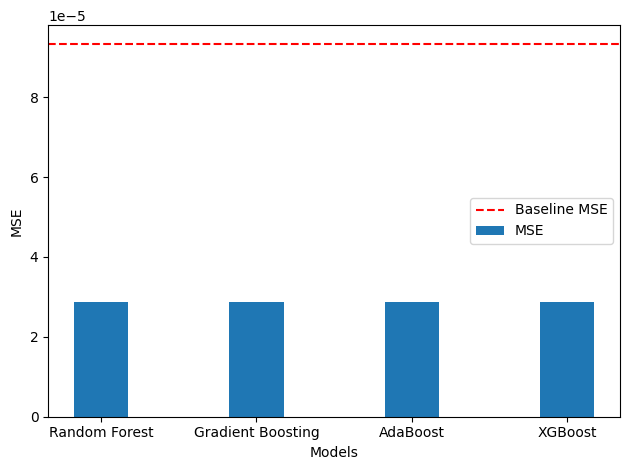

In [20]:
# Bar graph visualization of MSE values
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects = ax.bar(x, mse, width, label='MSE')
ax.axhline(y=baseline_mse, color='red', linestyle='--', label='Baseline MSE')
ax.set_ylabel('MSE')
ax.set_xlabel('Models')
ax.set_xticks(x)
ax.set_xticklabels(models.keys())
ax.legend()

fig.tight_layout()
plt.show()

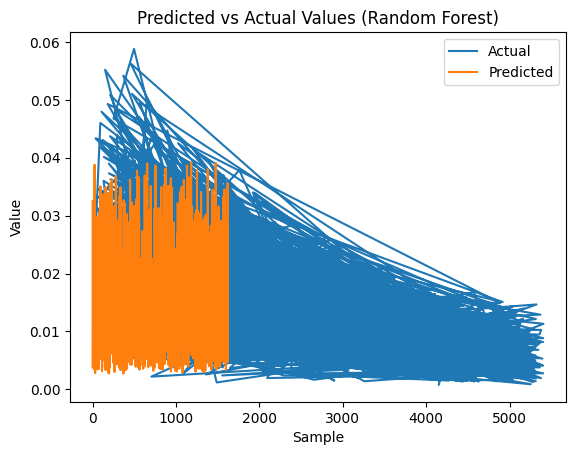

In [21]:
model_name = 'Random Forest'
y_pred = predictions[model_name]

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title(f'Predicted vs Actual Values ({model_name})')
plt.legend()
plt.show()

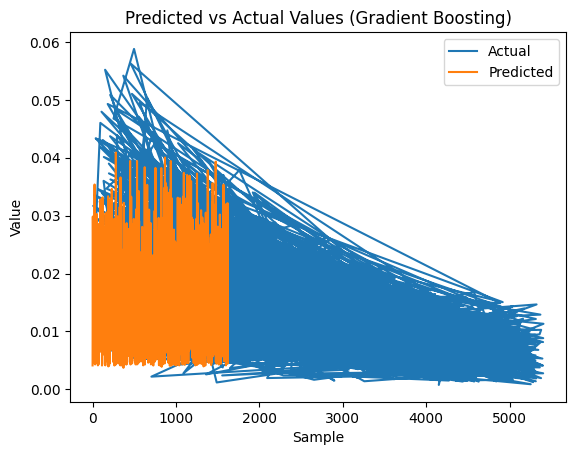

In [22]:
model_name = 'Gradient Boosting'
y_pred = predictions[model_name]

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title(f'Predicted vs Actual Values ({model_name})')
plt.legend()
plt.show()